In [1]:
#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [ ]:
Pandas - dzięki temu pobieranie i przekształcanie danych będzie szybkie.
Sklearn - Możemy wykorzystać wbudowane modele uczenia maszynowego.
Scipy - To sprawi, że interpretacja naszych wyników będzie znacznie wygodniejsza.
Matplotlib -ta biblioteka pomoże w tworzeniu efektów wizualnych

In [3]:
# Załadowanie danych
#path =r"C:\Users\Kasia\Desktop\mown\oil_exxon.xlsx"
path =r"C:\Users\Kasia\Desktop\mown\oil_exxon.xlsx"
price_data = pd.read_excel(path)

price_data.index = pd.to_datetime(price_data['date'])
price_data = price_data.drop(['date'], axis = 1)

# pokaż pierwsze 5 wierszy
price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [4]:
# sprawdzenie typów danych, w tym przypadku wszystko wygląda dobrze, nie trzeba wprowadzać żadnych zmian.
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [5]:
# Zdefiniowanie nowej nazwy.
new_column_names = {'exon_price':'exxon_price'}

# zmienianie nazwy kolumny
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [6]:
# sprawdzenie czy nie ma brakujących wartości w komórkach
display(price_data.isna().any())

# usunięcie brakujących wartości
price_data = price_data.dropna()

# sprawdzenie czy wszystko zostało usunięte
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

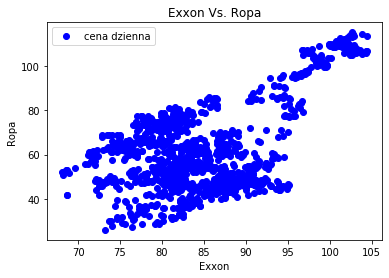

In [9]:
# zdefiniowanie danych x & y.
x = price_data['exxon_price']
y = price_data['oil_price']

# stworzenie wykresu.
plt.plot(x, y, 'o', color ='blue', label = 'cena dzienna')

# upewnienie się, że jest sformatowany.
plt.title("Exxon Vs. Ropa")
plt.xlabel("Exxon")
plt.ylabel("Ropa")
plt.legend()

plt.show()

Na pierwszy rzut oka można stwierdzić, że istnieje tutaj pewien związek, kiedy  jedna się wznosi, druga również wydaje się podnosić, a także obie się poruszają. Teraz należy zmierzyć korelację między dwiema zmiennymi. Weźmiemy DataFrame i wywołamy metodę corr (), aby zwrócić DataFrame z danymi.

In [10]:
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


W tym przypadku występuje bardzo silna współzależność (|r|>0.8 =>)

In [11]:
# podsumowanie statystyczne.
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


Teraz należy podzielić dane na zestaw szkoleniowy i zestaw testowy. Zestaw treningowy jest tym, na czym będziemy trenować model, a zestaw testowy jest tym, na czym będziemy go testować. 

In [13]:
# zdefiniowanie zmiennej wejściowej (X) i zmiennej wyjściowej.
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

# Podzielenie X i y na X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [15]:
#stworzenie modelu regresji liniowej.
regression_model = LinearRegression()

# przekazanie przez zestaw danych X_train & y_train.
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# testowanie prognozy
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("prognozowana wartość wynosi {:.4}".format(predicted_value))

prognozowana wartość wynosi 85.95


In [19]:
# Testowanie kilku prognoz.
y_predict = regression_model.predict(X_test)

# Pokazanie pierwszych 5 prognoz
y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

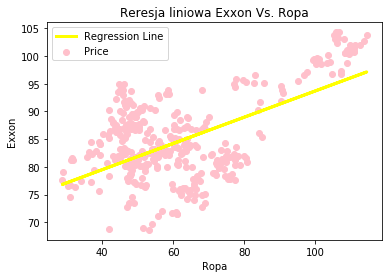

In [22]:
# pokazanie wyników
plt.scatter(X_test, y_test,  color='pink', label = 'Price')
plt.plot(X_test, y_predict, color='yellow', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Reresja liniowa Exxon Vs. Ropa")
plt.xlabel("Ropa")
plt.ylabel("Exxon")
plt.legend()
plt.show()
